In [12]:
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, Subset
import torchvision.transforms as transforms

dataset_storage_directory = './mnist_dataset'
image_resolution = (28, 28)

mnist_dataset = datasets.MNIST(
    root=dataset_storage_directory,
    train=True,
    transform=transforms.Compose([
        transforms.Resize(image_resolution),
        transforms.ToTensor()
    ]),
    download=True
)
from torch.utils.data import DataLoader

batch_size = 64
indices_of_digit_1 = [i for i, label in enumerate(mnist_dataset.targets) if label == 1]

# Create a subset of the dataset for digit '1' only
#mnist_dataset = Subset(mnist_dataset, indices_of_digit_1)
dataloader = DataLoader(mnist_dataset, batch_size=batch_size, shuffle=True, drop_last=True)


In [13]:
import torch.nn as nn
import torch
class Encoder(nn.Module):
  def __init__(self, image_depth=1):
    super(Encoder, self).__init__()
    self.cnn1 = nn.Conv2d(in_channels=image_depth, out_channels=16, kernel_size=3, stride=2, padding=1)
    self.relu1 = nn.ReLU()
    self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=2, padding=1)
    self.relu2 = nn.ReLU()
  def forward(self, x, apply_sigmoid=False):
    x = self.cnn1(x)
    x = self.relu1(x)
    x = self.cnn2(x)
    # x = self.relu2(x)
    if apply_sigmoid:
      x = torch.sigmoid(x)
    return x
class Decoder(nn.Module):
  def __init__(self, input_image_depth=32, output_image_depth=1):
    super(Decoder, self).__init__()
    self.cnn1 = nn.ConvTranspose2d(in_channels=input_image_depth, out_channels=16, kernel_size=3, stride=2, padding=1, output_padding=1)
    self.relu1 = nn.ReLU()
    self.cnn2 = nn.ConvTranspose2d(in_channels=16, out_channels=output_image_depth, kernel_size=3, stride=2, padding=1, output_padding=1)
    self.relu2 = nn.ReLU()
  def forward(self, x, apply_sigmoid=True):
    x = self.cnn1(x)
    x = self.relu1(x)
    x = self.cnn2(x)
    # x = self.relu2(x)
    if apply_sigmoid:
      x = torch.sigmoid(x)
    return x

In [14]:
from tqdm.notebook import tqdm
EPOCHS=10
encoder = Encoder()
decoder = Decoder()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
def autoencoder_reconstruction_loss(real_images, reconstructed_images):
  return torch.mean(torch.square((real_images - reconstructed_images)))
loss_function = nn.MSELoss()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
optimizer = torch.optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=0.001)
encoder.to(device)
decoder.to(device)
for i in range(0, EPOCHS):
  for image_batch, _ in tqdm(dataloader, desc=f"Epoch {i+1}"):
    image_batch = image_batch.float().to(device)
    encoded_images = encoder(image_batch)
    decoded_images = decoder(encoded_images)
    loss = autoencoder_reconstruction_loss(image_batch, decoded_images)
    # loss = loss_function(image_batch, decoded_images)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 1:   0%|          | 0/937 [00:00<?, ?it/s]

Epoch 2:   0%|          | 0/937 [00:00<?, ?it/s]

Epoch 3:   0%|          | 0/937 [00:00<?, ?it/s]

Epoch 4:   0%|          | 0/937 [00:00<?, ?it/s]

Epoch 5:   0%|          | 0/937 [00:00<?, ?it/s]

Epoch 6:   0%|          | 0/937 [00:00<?, ?it/s]

Epoch 7:   0%|          | 0/937 [00:00<?, ?it/s]

Epoch 8:   0%|          | 0/937 [00:00<?, ?it/s]

Epoch 9:   0%|          | 0/937 [00:00<?, ?it/s]

Epoch 10:   0%|          | 0/937 [00:00<?, ?it/s]

In [15]:
loss

tensor(0.0003, grad_fn=<MeanBackward0>)

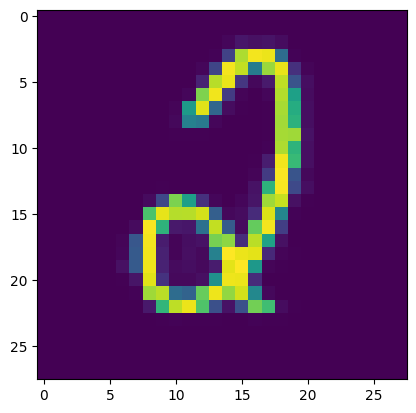

In [26]:
import matplotlib.pyplot as plt
plt.imshow(decoded_images[3][0].cpu().detach().numpy())

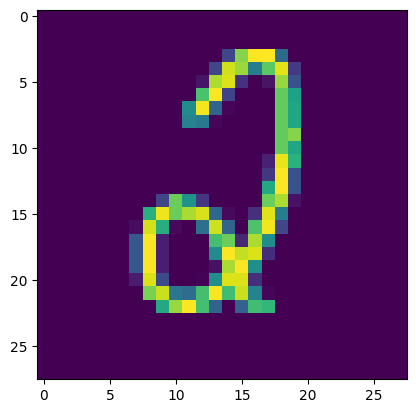

In [25]:
plt.imshow(image_batch[3][0].cpu().detach().numpy())